**RUTHVIK SAI D**

**21BDS0136**



https://github.com/Ruuthviik/EDA_Assignment1.git

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np



In [5]:
#1: Load the Dataset
file_path = r"/content/bodyPerformance.csv"
data = pd.read_csv(file_path)
print(data.head())



   age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0   27      M      172.3      75.24        21.3       80.0     130.0   
1   25      M      165.0      55.80        15.7       77.0     126.0   
2   31      M      179.6      78.00        20.1       92.0     152.0   
3   32      M      174.5      71.10        18.4       76.0     147.0   
4   28      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B  


In [6]:
#2: Explore Dataset Dimensions and Summary
print("Dataset Dimensions: ", data.shape)
print("\nSummary Statistics:\n", data.describe())



Dataset Dimensions:  (13393, 12)

Summary Statistics:
                 age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13392.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240258     78.796842   
std       13.625639      8.426583     11.949666      7.257107     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13392.000000  13393.000000             13393.000000    13393.000000   
mean     130.233938     36.963877                15.209268       39.771224   

In [7]:
#Data Deduplication
data = data.drop_duplicates()

In [47]:
#3: Data Handling and Cleaning
# Fill missing values with median/mode
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['body fat_%'].fillna(data['body fat_%'].median(), inplace=True)
data['systolic'].fillna(data['systolic'].median(), inplace=True)
# Check for any remaining missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 age                         0
gender                      0
height_cm                   0
weight_kg                   0
body fat_%                  0
diastolic                   0
systolic                    0
gripForce                   0
sit and bend forward_cm     0
sit-ups counts              0
broad jump_cm               0
class                       0
age_group                   0
body_fat_group              0
Spectral_Cluster            0
Document_Cluster            0
PCA1                        0
PCA2                        0
class_encoded               0
weight_ma                  29
dtype: int64


<ipython-input-47-9f2a160e8f9f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].fillna(data['gender'].mode()[0], inplace=True)
<ipython-input-47-9f2a160e8f9f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

**BINNING**

In [48]:
# Binning (Discretization)
# Binning the 'age' column into categories
age_bins = [20, 30, 40, 50, 60, 70]  # You can adjust these bin ranges
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# Binning the 'body fat_%' column into categories
body_fat_bins = [0, 10, 20, 30, 40, 100]  # These ranges can be adjusted based on your understanding of body fat
body_fat_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-100%']
data['body_fat_group'] = pd.cut(data['body fat_%'], bins=body_fat_bins, labels=body_fat_labels)

# Verify Binning Results
print("\nBinning Applied to 'age' and 'body fat_%':\n", data[['age', 'age_group', 'body fat_%', 'body_fat_group']].head())


Binning Applied to 'age' and 'body fat_%':
    age age_group  body fat_% body_fat_group
0   27     20-30        21.3         20-30%
1   25     20-30        15.7         10-20%
2   31     30-40        20.1         20-30%
3   32     30-40        18.4         10-20%
4   28     20-30        17.1         10-20%


**MODULE - 3**

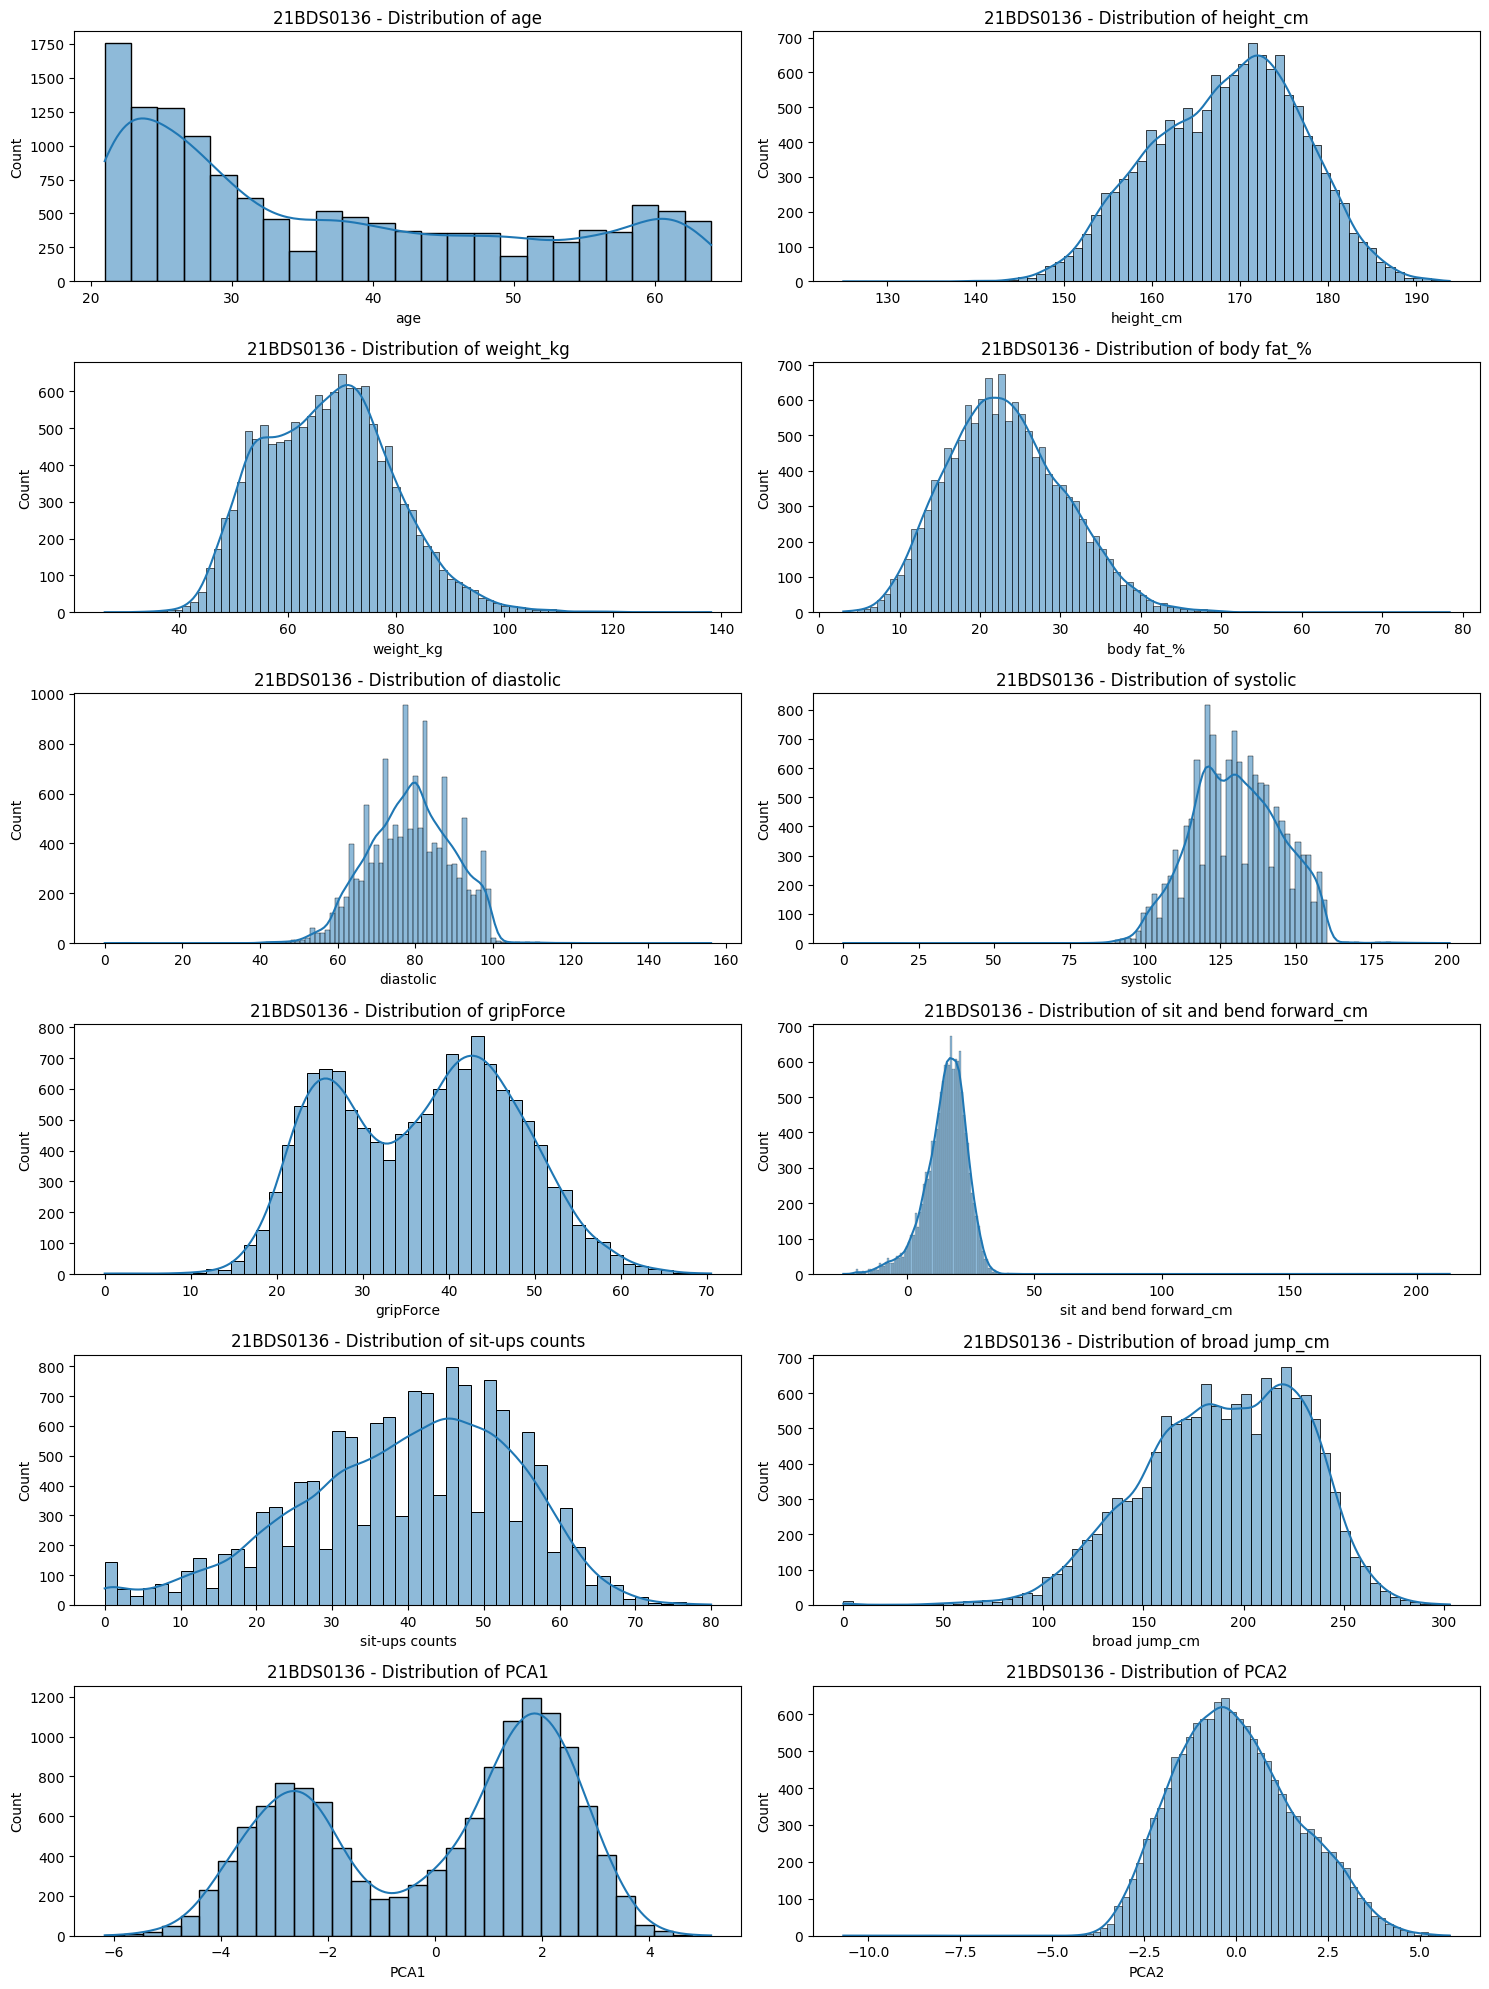

In [20]:

#Univariate Analysis
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(6, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'21BDS0136 - Distribution of {col}')
plt.tight_layout()
plt.show()



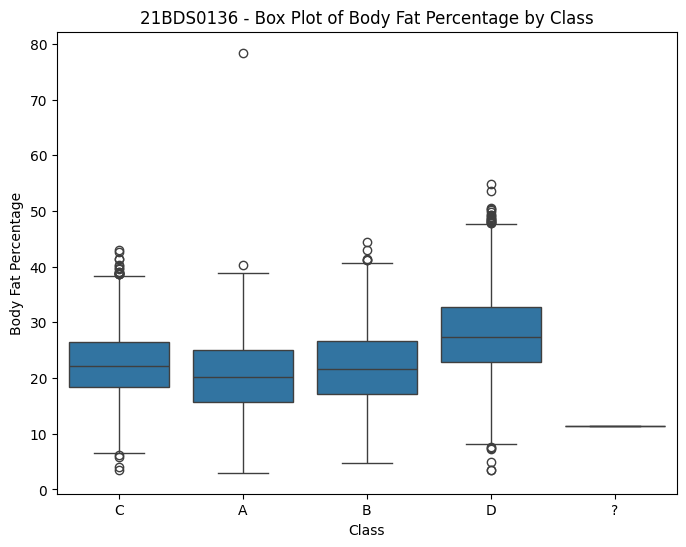

In [26]:
# Box plot for 'body fat_%' grouped by 'class'
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='body fat_%', data=data)
plt.title('21BDS0136 - Box Plot of Body Fat Percentage by Class')
plt.xlabel('Class')
plt.ylabel('Body Fat Percentage')
plt.show()

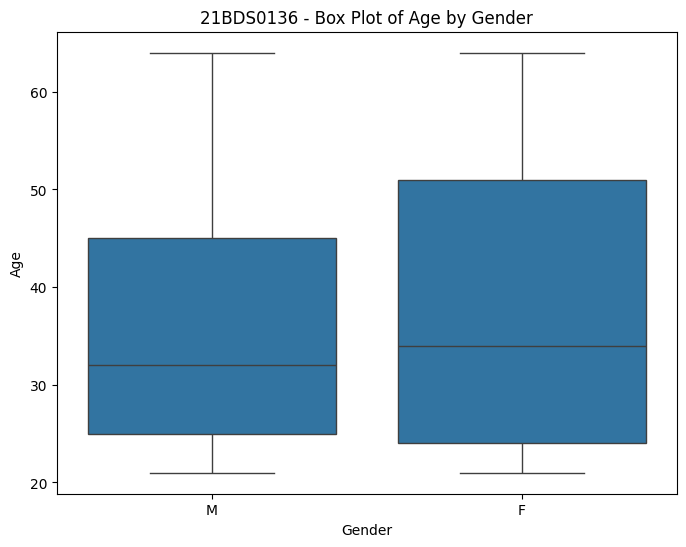

In [27]:

# Box plot for 'age' grouped by 'gender'
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=data)
plt.title('21BDS0136 - Box Plot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


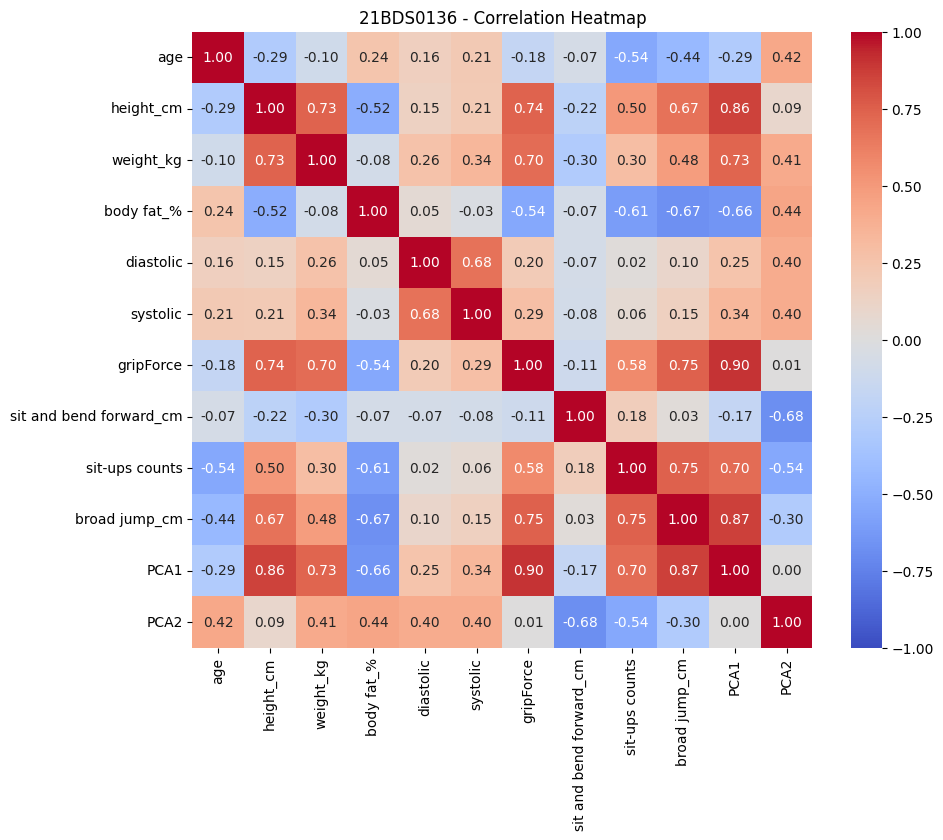

In [28]:
#Bivariate Analysis (Correlation Matrix)
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('21BDS0136 - Correlation Heatmap')
plt.show()


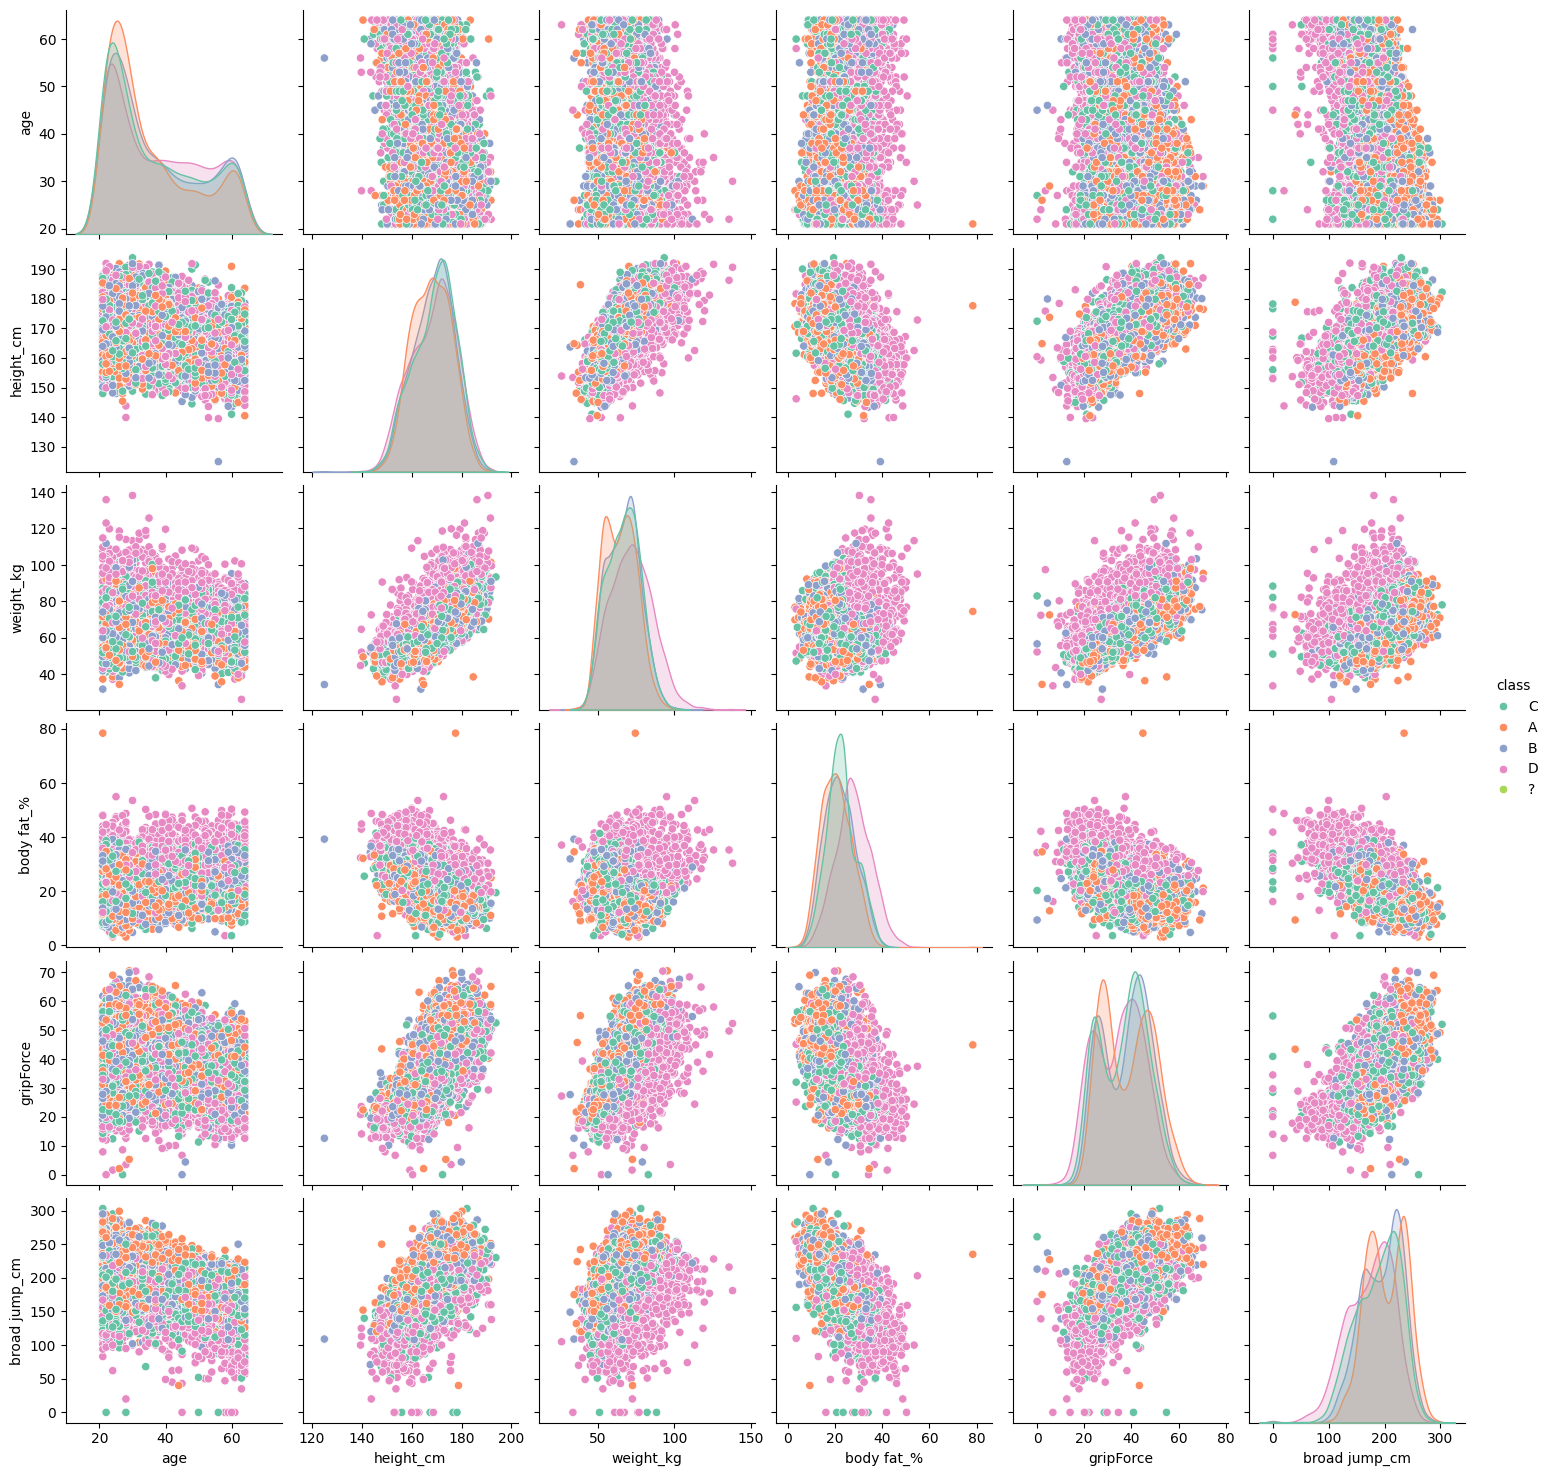

In [29]:
#Multivariate Analysis (Pairplot with class as hue)
selected_columns = ['age', 'height_cm', 'weight_kg', 'body fat_%', 'gripForce', 'broad jump_cm', 'class']
sns.pairplot(data[selected_columns], hue='class', palette='Set2')
plt.show()

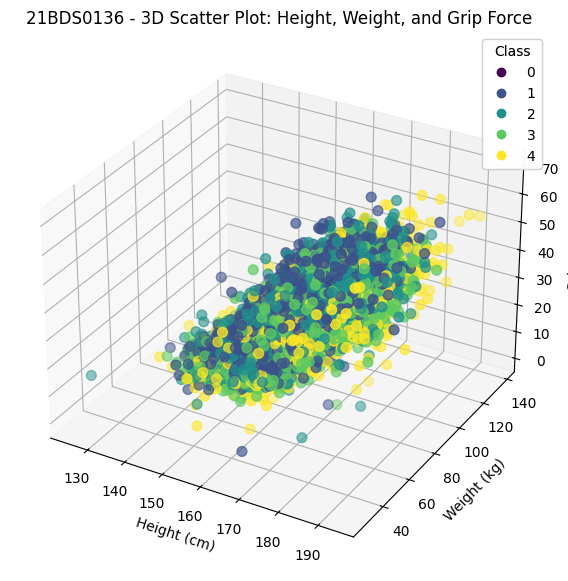

In [30]:

from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

# Encode categorical 'class' values to numerical values
label_encoder = LabelEncoder()
data['class_encoded'] = label_encoder.fit_transform(data['class'])  # Add a new column for encoded class

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using height, weight, and gripForce
x = data['height_cm']
y = data['weight_kg']
z = data['gripForce']

# Color by encoded class values
scatter = ax.scatter(x, y, z, c=data['class_encoded'], cmap='viridis', s=50)

# Add labels and title
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Weight (kg)')
ax.set_zlabel('Grip Force')
ax.set_title('21BDS0136 - 3D Scatter Plot: Height, Weight, and Grip Force')

# Create color legend
legend1 = ax.legend(*scatter.legend_elements(), title="Class")
ax.add_artist(legend1)

plt.show()


**TIME SERIES ANALYSIS**

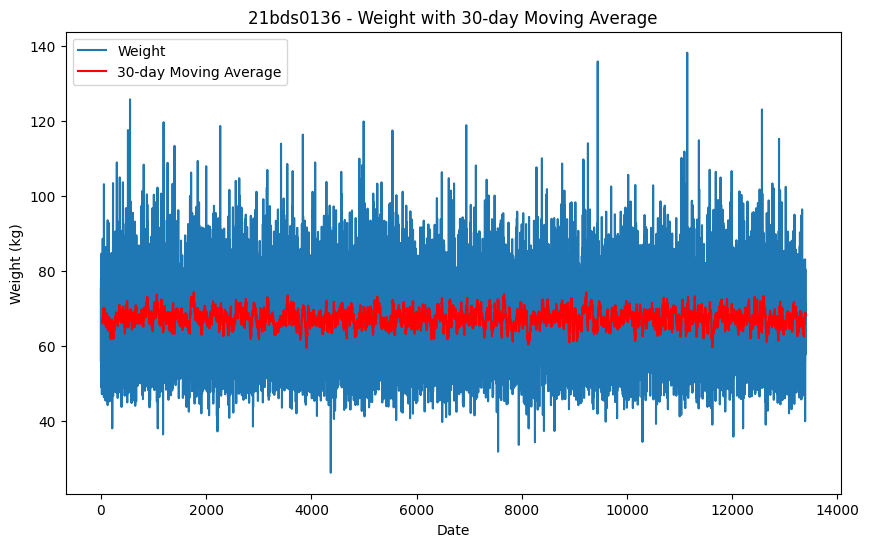

In [31]:
#Time Series Analysis (Moving Averages, Decomposition, etc.)

data['weight_ma'] = data['weight_kg'].rolling(window=30).mean()  # 30-day moving average

plt.figure(figsize=(10, 6))
plt.plot(data['weight_kg'], label='Weight')
plt.plot(data['weight_ma'], label='30-day Moving Average', color='red')
plt.title('21bds0136 - Weight with 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

In [32]:
#7: Encoding Categorical Variables
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['class'] = le.fit_transform(data['class'])



In [33]:

#Summary statistics for numerical columns
print("\nStatistical Summary (1-D Analysis):\n", data.describe())


Statistical Summary (1-D Analysis):
                 age        gender     height_cm     weight_kg    body fat_%  \
count  13392.000000  13392.000000  13392.000000  13392.000000  13392.000000   
mean      36.775836      0.632243    168.560671     67.448686     23.239668   
std       13.625886      0.482213      8.426305     11.949061      7.256822   
min       21.000000      0.000000    125.000000     26.300000      3.000000   
25%       25.000000      0.000000    162.400000     58.200000     18.000000   
50%       32.000000      1.000000    169.200000     67.400000     22.800000   
75%       48.000000      1.000000    174.800000     75.300000     28.000000   
max       64.000000      1.000000    193.800000    138.100000     78.400000   

          diastolic      systolic     gripForce  sit and bend forward_cm  \
count  13392.000000  13392.000000  13392.000000             13392.000000   
mean      78.797499    130.237224     36.964569                15.208933   
std       10.742165   

**MODULE - 4**

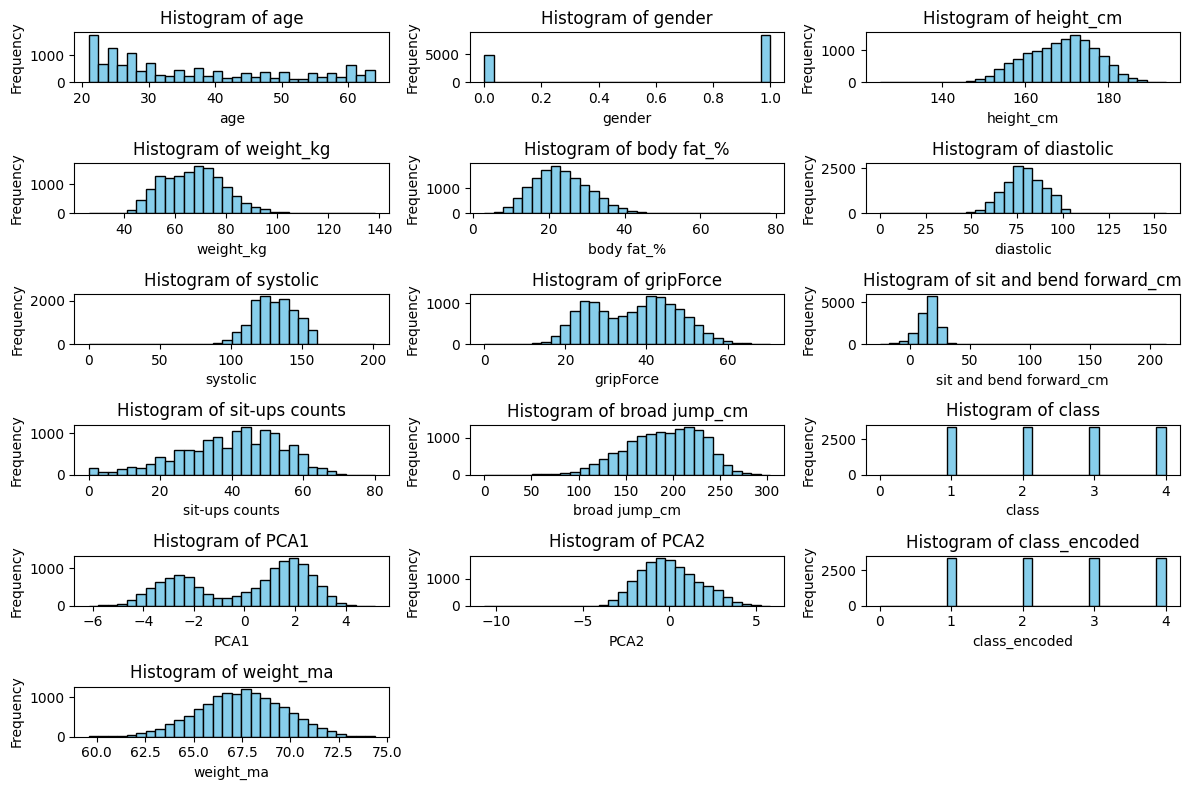

In [34]:
#1-D Statistical Data Analysis
import matplotlib.pyplot as plt

# Plot histograms for each numeric column in the dataset
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i)

    # Remove NaN values before plotting
    col_data = data[col].dropna()

    plt.hist(col_data, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

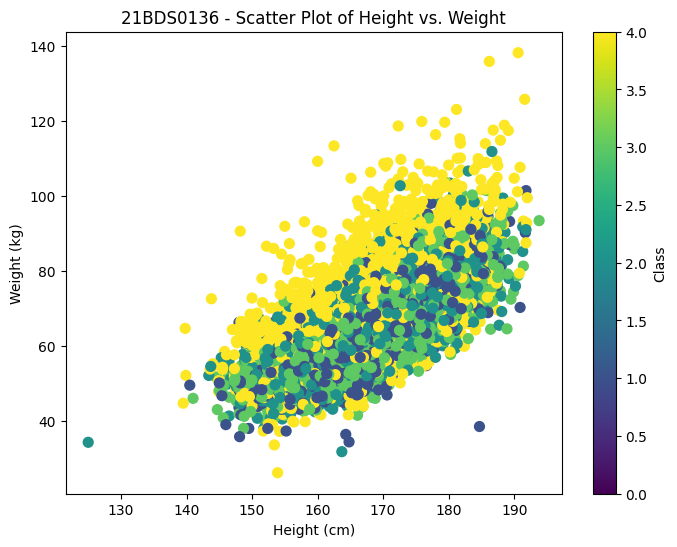

In [35]:
#2-D Statistical Data Analysis (Correlation & Pair Analysis)
# Example: Correlation between 'age' and 'weight_kg'
# Plot a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['height_cm'], data['weight_kg'], c=data['class'], cmap='viridis', s=50)
plt.title('21BDS0136 - Scatter Plot of Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.colorbar(label='Class')
plt.show()


Explained Variance Ratio by each component: [0.69388079 0.12223417 0.05145178 0.04717195 0.0271542  0.01866335
 0.01683094 0.01168791 0.00778052 0.00303216]
Total Variance Explained by first 10 components: 0.9998877705735864


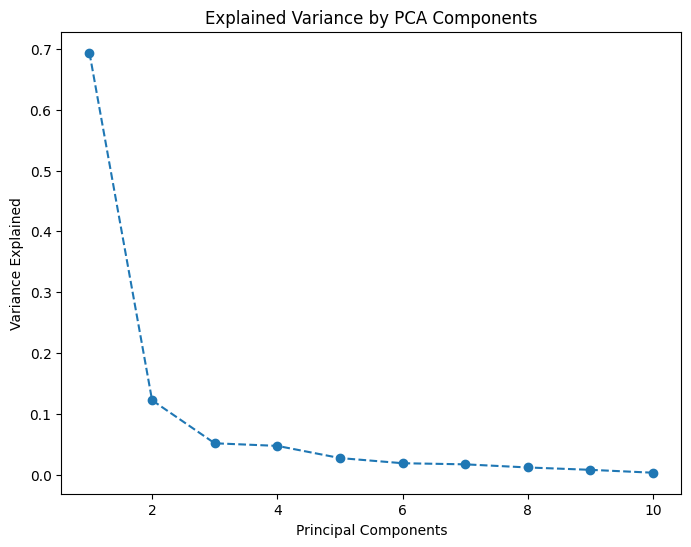

In [36]:
#ND Statistical Data Analys
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the dimensions, for example, 10 components
pca = PCA(n_components=10)
pca_data = pca.fit_transform(numeric_data)

# Variance explained by each principal component
print("Explained Variance Ratio by each component:", pca.explained_variance_ratio_)

# Total variance explained by the first N components
print("Total Variance Explained by first 10 components:", sum(pca.explained_variance_ratio_))

# Create a scree plot to visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()


In [37]:
#Contingency Table (Gender vs Class)
contingency_table = pd.crosstab(data['gender'], data['class'])
print("\nContingency Table (Gender vs Class):\n", contingency_table)


Contingency Table (Gender vs Class):
 class   0     1     2     3     4
gender                           
0       0  1483  1185  1112  1145
1       1  1864  2162  2236  2204


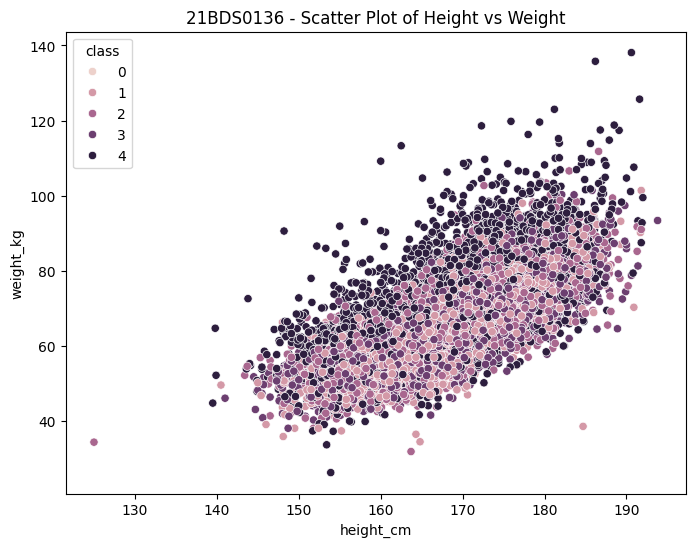

In [38]:
#Visualizations Scatter Plot

plt.figure(figsize=(8, 6))
sns.scatterplot(x='height_cm', y='weight_kg', data=data, hue='class')
plt.title('21BDS0136 - Scatter Plot of Height vs Weight')
plt.show()

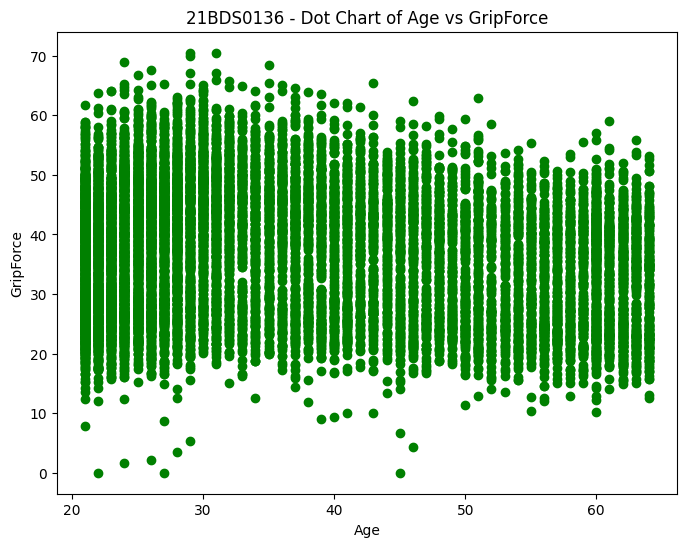

In [39]:
# Dot Chart
plt.figure(figsize=(8, 6))
plt.plot(data['age'], data['gripForce'], 'o', color='green')
plt.title('21BDS0136 - Dot Chart of Age vs GripForce')
plt.xlabel('Age')
plt.ylabel('GripForce')
plt.show()

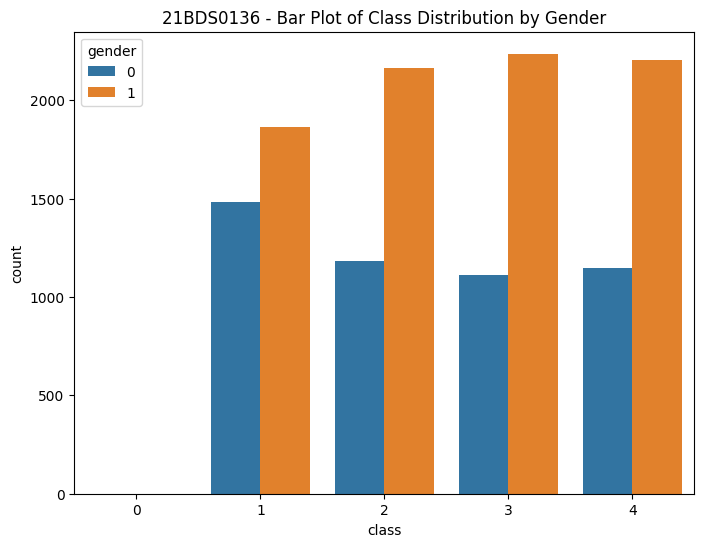

In [40]:
# Bar Plot ('gender' distribution in 'class')
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='gender', data=data)
plt.title('21BDS0136 - Bar Plot of Class Distribution by Gender')
plt.show()

**Module:5**

**SPECTRAL CLUSTERING**

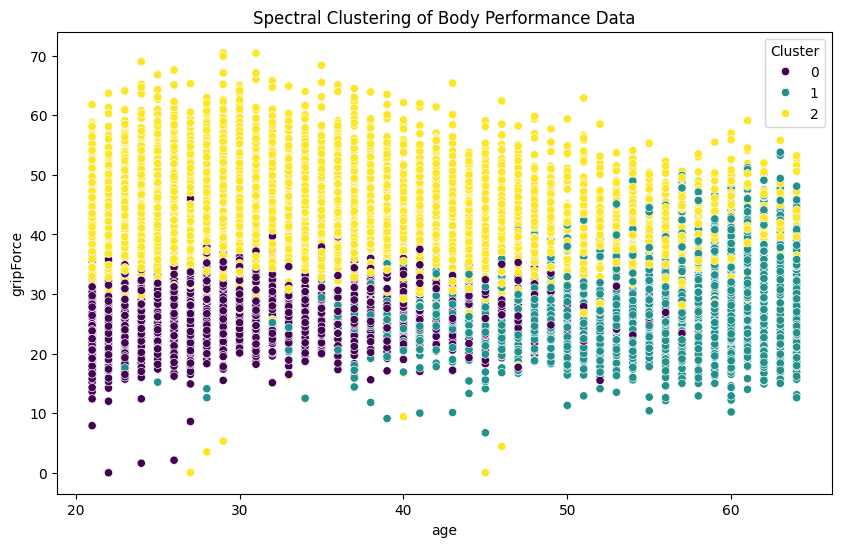

In [41]:

from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

numeric_features = data[['age', 'gripForce', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']]

# Scale the numeric features before applying Spectral Clustering
scaler = StandardScaler()  # Create a scaler object
scaled_features = scaler.fit_transform(numeric_features) # Scale the features

# Apply Spectral Clustering
spectral_model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral_model.fit_predict(scaled_features)

# Add the cluster labels back to the DataFrame
data['Spectral_Cluster'] = spectral_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
# Select two features for visualization
# You can change these to any two numeric features from your dataset
x_feature = 'age'
y_feature = 'gripForce'
sns.scatterplot(x=x_feature, y=y_feature, hue='Spectral_Cluster', data=data, palette='viridis')
plt.title("Spectral Clustering of Body Performance Data")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title="Cluster")
plt.show()

**Document clustering**

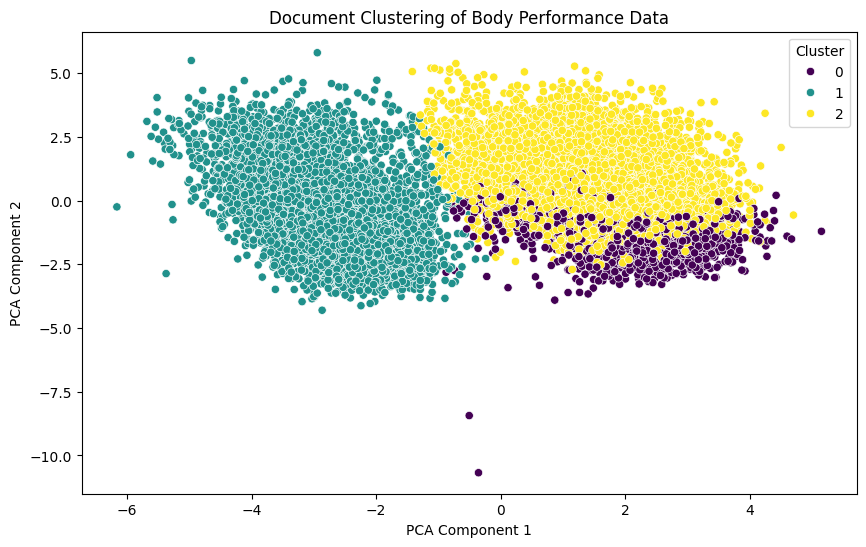

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer




# Select numerical features and encode categorical features
numeric_features = data.select_dtypes(include=[float, int])
categorical_features = pd.get_dummies(data[['gender', 'class']], drop_first=True)

# Combine numerical and encoded categorical features
features = pd.concat([numeric_features, categorical_features], axis=1)

# Standardize the features
scaler = StandardScaler()

# Impute missing values before scaling
imputer = SimpleImputer(strategy='mean') # Create an imputer object with your desired strategy
features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns) # Impute and convert back to DataFrame

scaled_features = scaler.fit_transform(features)

# Apply KMeans Clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
document_labels = kmeans_model.fit_predict(scaled_features)
data['Document_Cluster'] = document_labels

# Use PCA for visualization of the clusters
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_features)
data['PCA1'] = pca_transformed[:, 0]
data['PCA2'] = pca_transformed[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Document_Cluster', data=data, palette='viridis')
plt.title("Document Clustering of Body Performance Data")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

**MINIMUM SPANNING TREE**

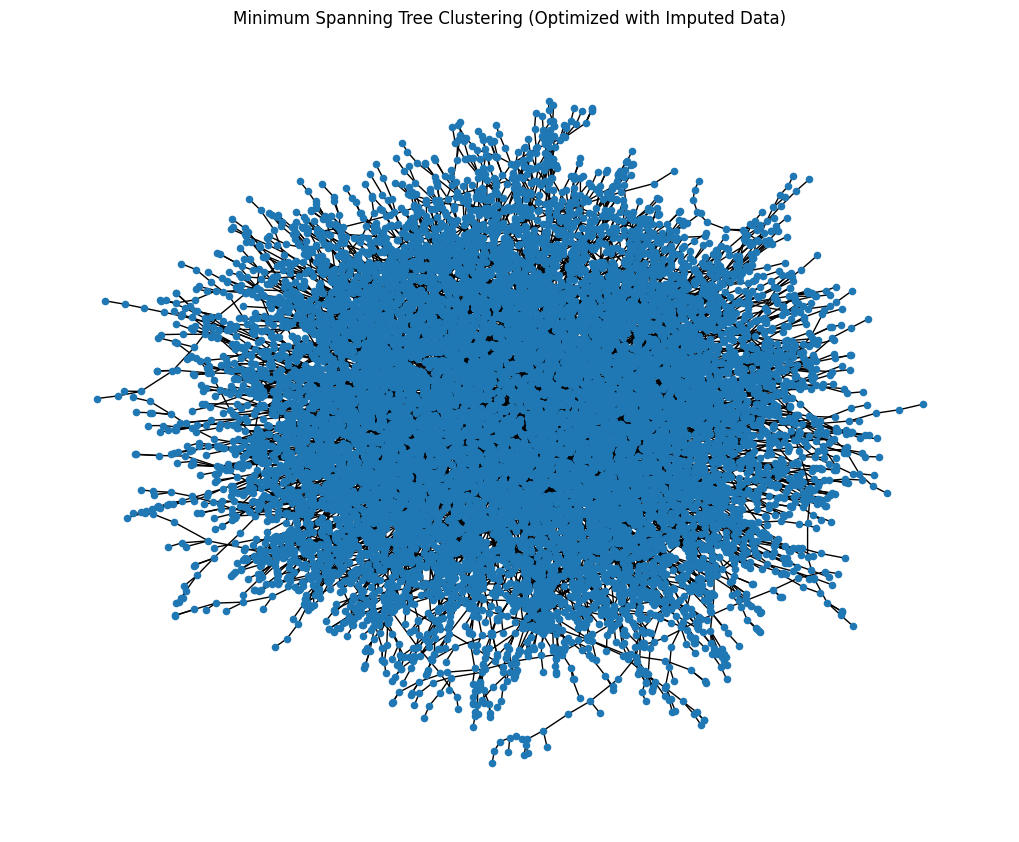

In [53]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
numerical_data_imputed = imputer.fit_transform(numerical_data)

# Proceed with MST
from sklearn.neighbors import NearestNeighbors
from scipy.sparse.csgraph import minimum_spanning_tree
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Compute Sparse Distance Matrix using Nearest Neighbors
nbrs = NearestNeighbors(n_neighbors=5, metric='euclidean').fit(numerical_data_imputed)
distances, indices = nbrs.kneighbors(numerical_data_imputed)

# Create a sparse graph using distances
n_samples = numerical_data_imputed.shape[0]
sparse_matrix = np.zeros((n_samples, n_samples))

for i, neighbors in enumerate(indices):
    for j, neighbor in enumerate(neighbors):
        sparse_matrix[i, neighbor] = distances[i, j]

# Step 2: Build the Minimum Spanning Tree
mst_matrix = minimum_spanning_tree(sparse_matrix).toarray()

# Step 3: Visualize the MST
G = nx.Graph(mst_matrix)

plt.figure(figsize=(10, 8))
nx.draw(G, node_size=20, with_labels=False)
plt.title("Minimum Spanning Tree Clustering (Optimized with Imputed Data)")
plt.show()


**Expectation-Maximization algorithm**

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

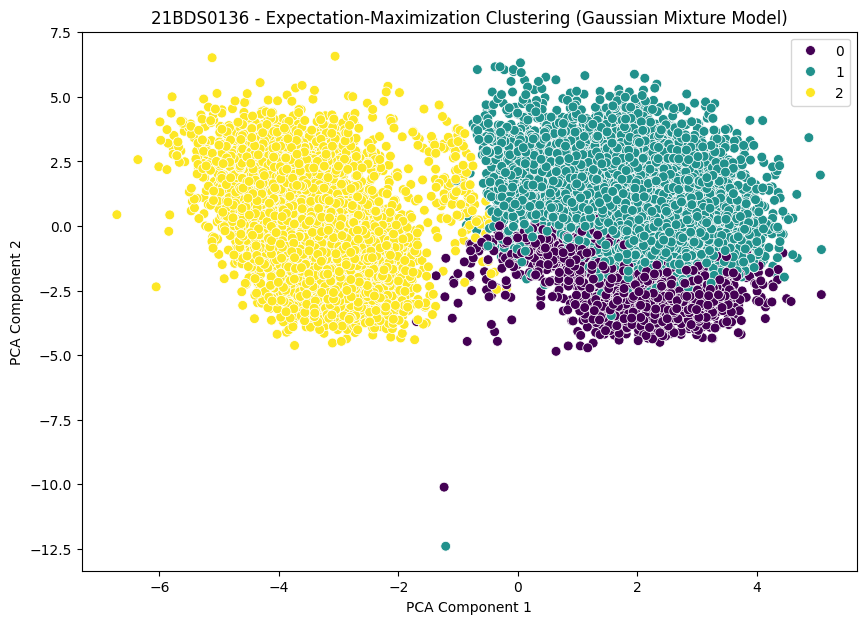

In [15]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

processed_data = data.copy()

# Step 1: Separate numerical and categorical data
numeric_data = processed_data.select_dtypes(include=[np.number])
# Ensure categorical features are properly selected - check your column names!
categorical_data = processed_data[['gender', 'class']]  # Assuming 'gender' and 'class' are your categorical columns

# Step 2: Impute missing values in numeric data using SimpleImputer (mean strategy)
imputer_numeric = SimpleImputer(strategy='mean')
numeric_data = pd.DataFrame(imputer_numeric.fit_transform(numeric_data), columns=numeric_data.columns)

# Step 3: Impute missing values in categorical data before one-hot encoding
# Use the most frequent value as the imputation strategy for categorical features
imputer_categorical = SimpleImputer(strategy='most_frequent')
categorical_data = pd.DataFrame(imputer_categorical.fit_transform(categorical_data), columns=categorical_data.columns)

# Step 4: Encode categorical data using one-hot encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False to get a dense array
categorical_data_encoded = encoder.fit_transform(categorical_data)

# Step 5: Combine numeric and encoded categorical data
processed_data = pd.DataFrame(numeric_data, columns=numeric_data.columns)
encoded_cat_df = pd.DataFrame(categorical_data_encoded, columns=encoder.get_feature_names_out(categorical_data.columns))
processed_data = pd.concat([processed_data, encoded_cat_df], axis=1)

# Step 6: Standardize the data for GMM
scaler = StandardScaler()
processed_data_scaled = scaler.fit_transform(processed_data)

# Step 7: Check and handle remaining NaNs (if any) after scaling
# Replace any remaining NaNs with 0, for example
processed_data_scaled = np.nan_to_num(processed_data_scaled)

# Step 8: Initialize and fit the Gaussian Mixture Model
n_components = 3  # Set to desired number of clusters
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm_labels = gmm.fit_predict(processed_data_scaled)

# Step 9: Add cluster labels to DataFrame
processed_data['Cluster'] = gmm_labels

# Step 10: Dimensionality reduction for visualization
pca = PCA(n_components=2)
reduced_data_2d = pca.fit_transform(processed_data_scaled)

# Step 11: Plot clusters in 2D
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_data_2d[:, 0], y=reduced_data_2d[:, 1], hue=gmm_labels, palette='viridis', s=50)
plt.title("21BDS0136 - Expectation-Maximization Clustering (Gaussian Mixture Model)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend

**Hierarchical Agglomerative Clustering**

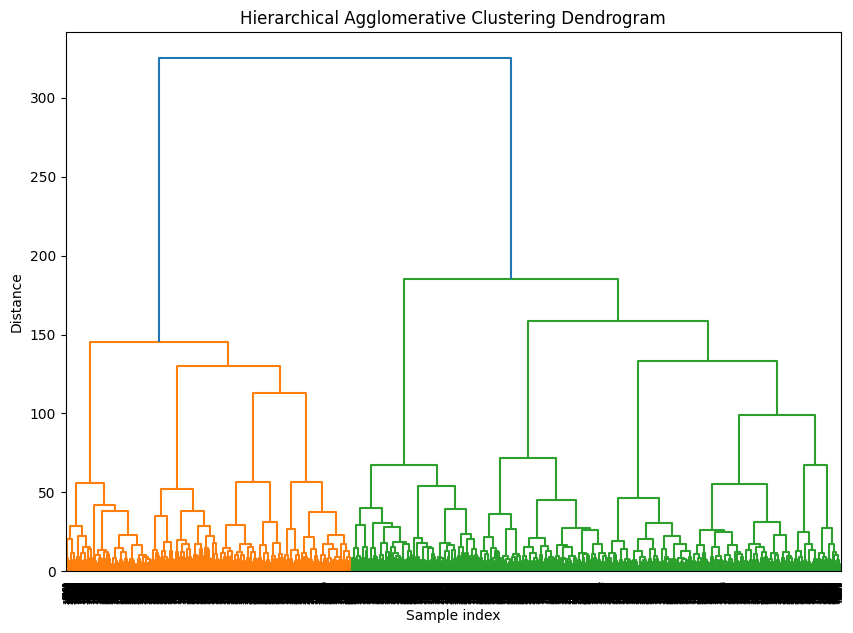

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering and create a dendrogram
linkage_matrix = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Agglomerative Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


**outlier detection**

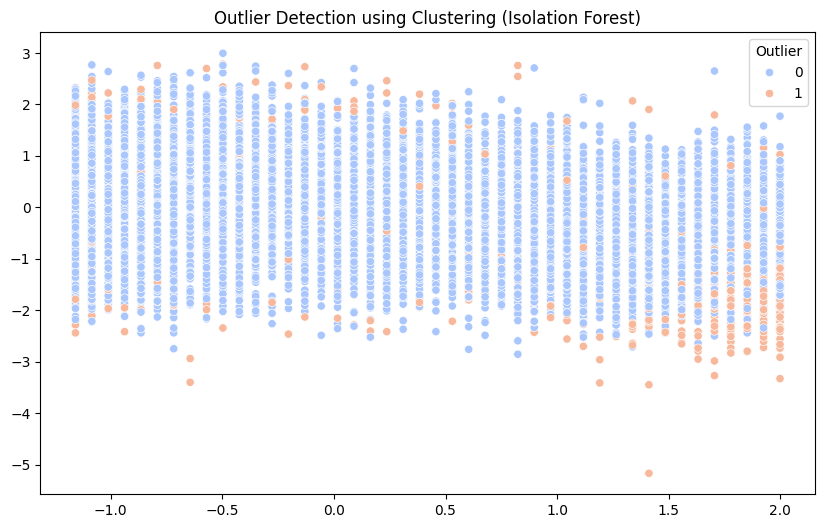

In [17]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for outlier detection
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = isolation_forest.fit_predict(scaled_features)
data['Outlier'] = np.where(outlier_labels == -1, 1, 0)

# Visualize Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['Outlier'], palette='coolwarm', marker='o')
plt.title("Outlier Detection using Clustering (Isolation Forest)")
plt.show()


**MODULE 6 - PCA**

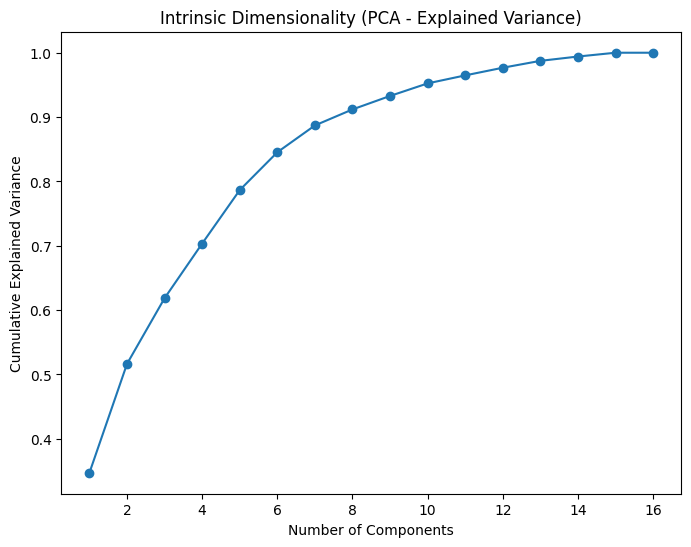

In [16]:
from sklearn.decomposition import PCA

# Assume scaled_features contains the standardized data
pca = PCA()
pca_data = pca.fit_transform(scaled_features)

# Plot explained variance ratio (for intrinsic dimensionality)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Intrinsic Dimensionality (PCA - Explained Variance)')
plt.show()


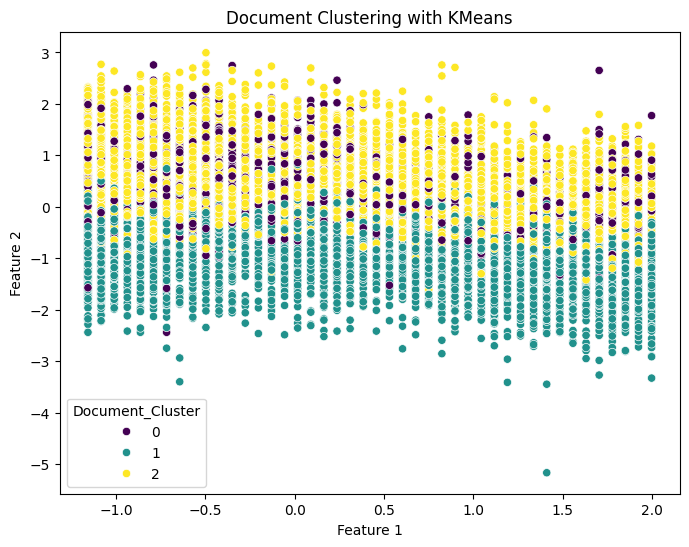

In [19]:
from sklearn.cluster import KMeans

# Assuming scaled_features is your standardized data and data is the original DataFrame
kmeans_model = KMeans(n_clusters=3, random_state=42)
data['Document_Cluster'] = kmeans_model.fit_predict(scaled_features)

# Now plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['Document_Cluster'], palette='viridis')
plt.title("Document Clustering with KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


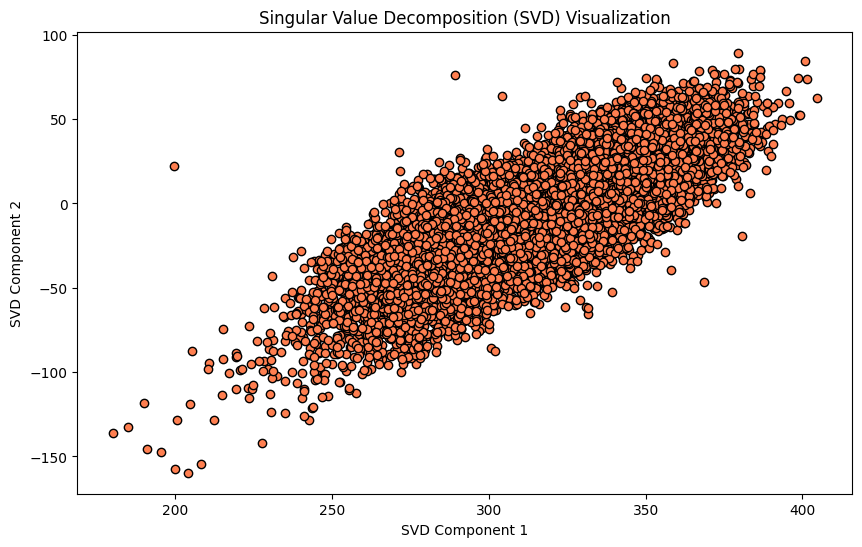

In [68]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Apply SVD to reduce to 2 components for visualization
svd = TruncatedSVD(n_components=2, random_state=42)
svd_result = svd.fit_transform(numerical_data.dropna())  # Drop NaNs or fill as needed

# Plotting the SVD result
plt.figure(figsize=(10, 6))
plt.scatter(svd_result[:, 0], svd_result[:, 1], c='coral', edgecolor='k')
plt.title('Singular Value Decomposition (SVD) Visualization')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()


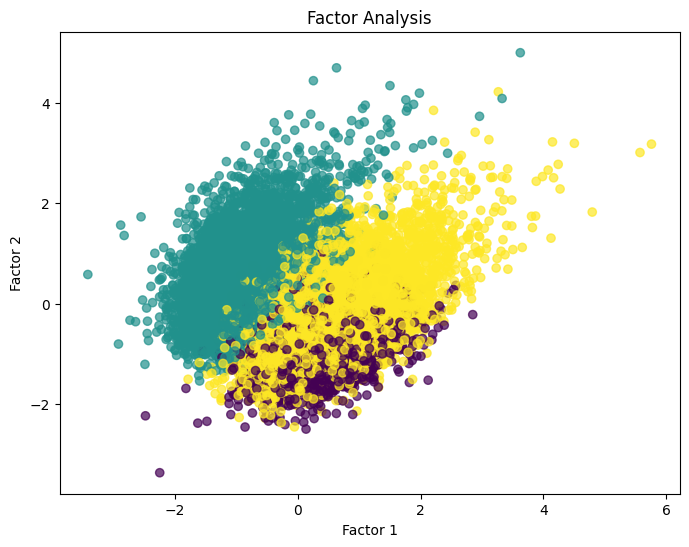

In [44]:
from sklearn.decomposition import FactorAnalysis

# Apply Factor Analysis to reduce to 2 factors
fa = FactorAnalysis(n_components=2, random_state=42)
fa_transformed = fa.fit_transform(scaled_features)

# Visualize Factor Analysis result
plt.figure(figsize=(8, 6))
plt.scatter(fa_transformed[:, 0], fa_transformed[:, 1], c=data['Document_Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis')
plt.show()


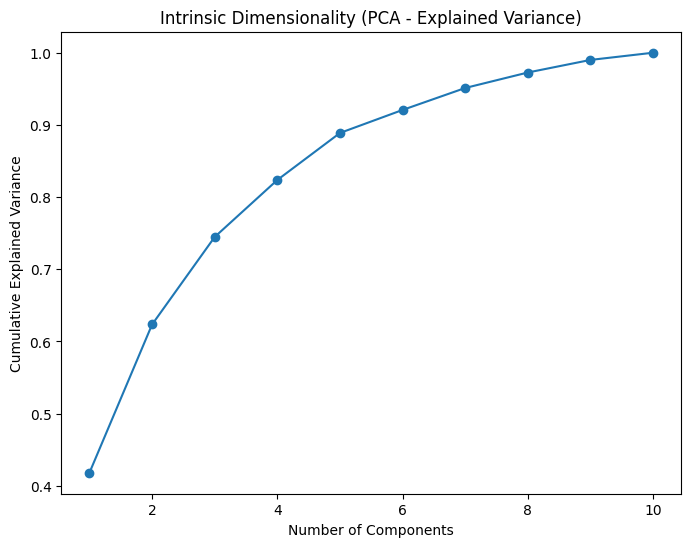

In [43]:
# Calculate cumulative explained variance for each component
pca_full = PCA().fit(scaled_features)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Intrinsic Dimensionality (PCA - Explained Variance)')
plt.show()


In [17]:

from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Drop non-feature columns such as 'weight_kg' (target column) and any other irrelevant columns
X = data.drop(columns=['weight_kg'])

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns

# Define transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



In [18]:
# Combine transformations in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)


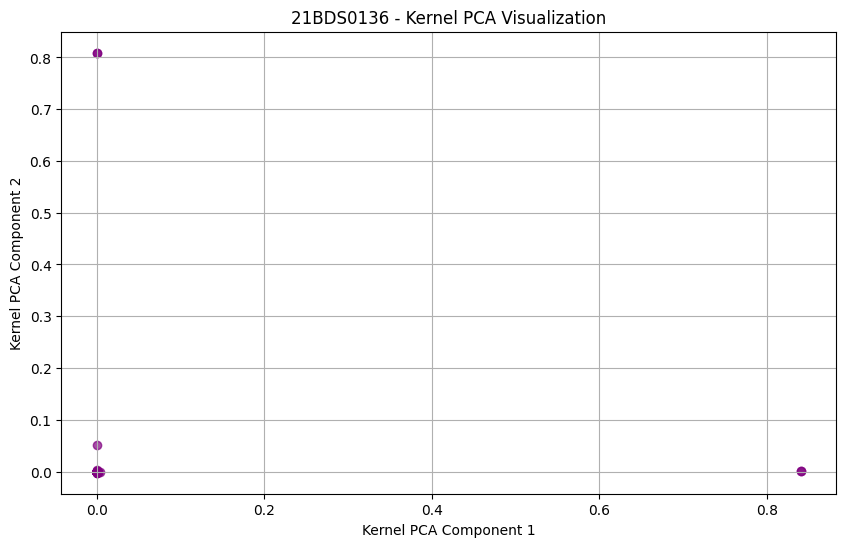

In [60]:

# Apply Kernel PCA for nonlinear dimensionality reduction
# Use the Radial Basis Function (RBF) kernel, which is common for nonlinear data
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=10)  # You can adjust gamma based on your data
X_kpca = kernel_pca.fit_transform(X_processed)

# Step 3: Visualization of the Kernel PCA result
plt.figure(figsize=(10, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.7, c='purple')
plt.title("21BDS0136 - Kernel PCA Visualization")
plt.xlabel("Kernel PCA Component 1")
plt.ylabel("Kernel PCA Component 2")
plt.grid(True)
plt.show()


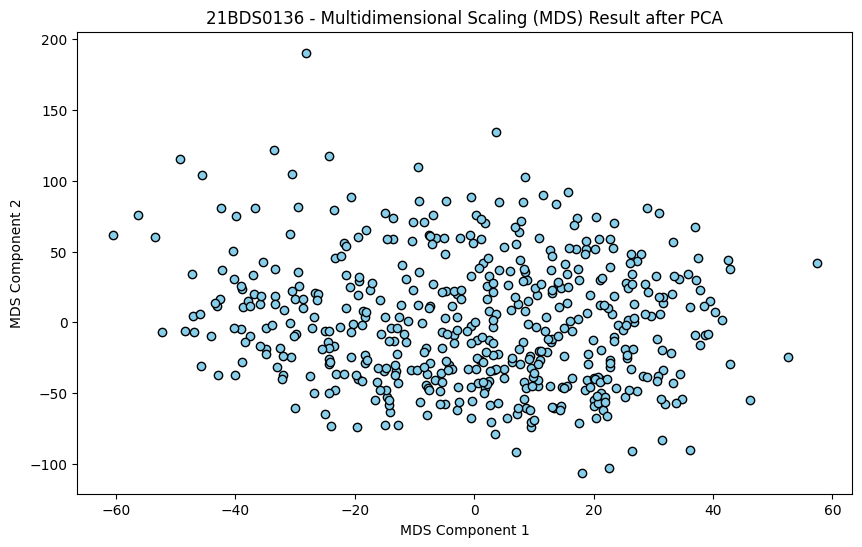

In [57]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Drop rows with any NaN values
numerical_data_dropped = numerical_data.dropna()

# Take a sample of the data if it is very large
sampled_data = numerical_data_dropped.sample(n=500, random_state=42)  # Adjust 'n' as needed

# Reduce dimensions with PCA to a smaller number of components
pca = PCA(n_components=5, random_state=42)
reduced_data = pca.fit_transform(sampled_data)

# Apply MDS on the reduced data
mds = MDS(n_components=2, random_state=42, n_jobs=-1)  # Enable parallel computation
mds_result = mds.fit_transform(reduced_data)

# Plot the MDS result
plt.figure(figsize=(10, 6))
plt.scatter(mds_result[:, 0], mds_result[:, 1], c='skyblue', edgecolors='k')
plt.title('21BDS0136 - Multidimensional Scaling (MDS) Result after PCA')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.show()


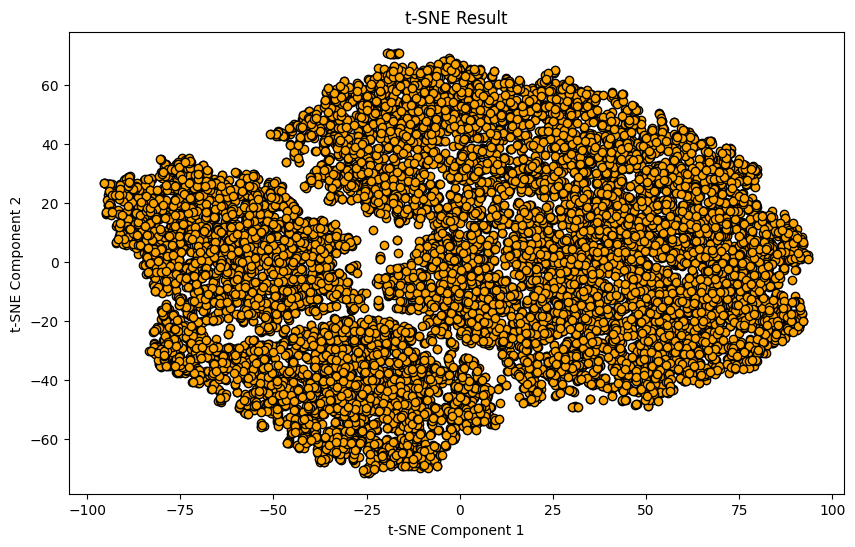

In [25]:
from sklearn.manifold import TSNE

# Define t-SNE with 2 components for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(numerical_data)

# Plotting the t-SNE result
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='orange', edgecolors='k')
plt.title('t-SNE Result')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


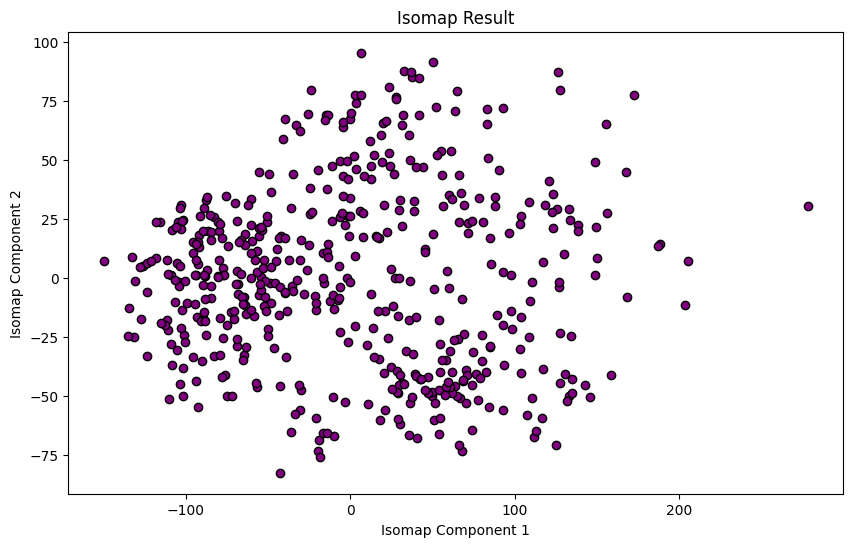

In [59]:
from sklearn.impute import SimpleImputer
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
numerical_data_imputed = imputer.fit_transform(numerical_data)

# Optionally, sample the data if it's very large
sampled_data = pd.DataFrame(numerical_data_imputed).sample(n=500, random_state=42)  # Adjust 'n' as needed

# Define Isomap with 2 components for visualization
isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(sampled_data)

# Plotting the Isomap result
plt.figure(figsize=(10, 6))
plt.scatter(isomap_result[:, 0], isomap_result[:, 1], c='purple', edgecolors='k')
plt.title('Isomap Result')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.show()


  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=d28b909906e3ef02602dafb5222a61beff44a55beba0723efee43934dd50ecef
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built MiniSom


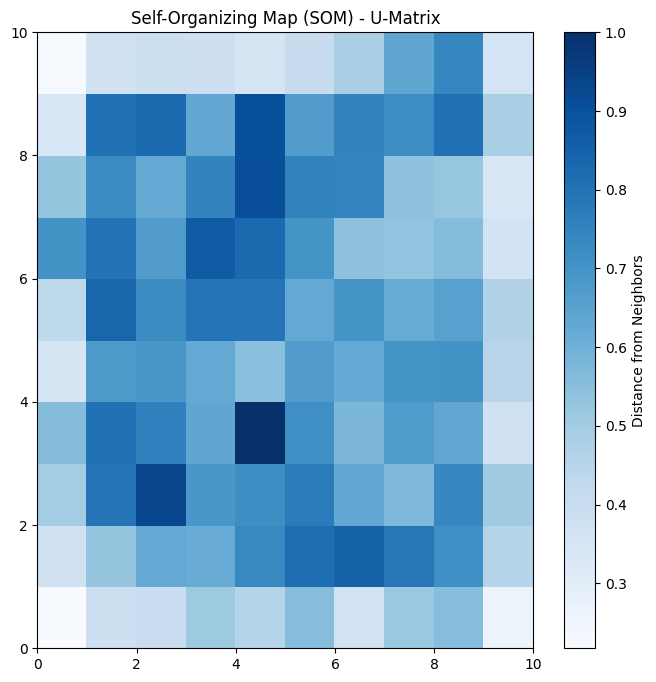

In [61]:
!pip install MiniSom
from minisom import MiniSom
import numpy as np

# Define SOM dimensions
som_grid_rows, som_grid_cols = 10, 10

# Initialize and train SOM
som = MiniSom(x=som_grid_rows, y=som_grid_cols, input_len=scaled_features.shape[1], sigma=0.5, learning_rate=0.5)
som.random_weights_init(scaled_features)
som.train_random(scaled_features, 100)

# Plot the U-Matrix (visualizes distances between the SOM nodes)
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='Blues')
plt.colorbar(label='Distance from Neighbors')
plt.title('Self-Organizing Map (SOM) - U-Matrix')
plt.show()


**MODULE - 7 Model Development and Evaluation**

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Step 1: Separate features and target variable
X = data.drop(columns=['Document_Cluster', 'weight_kg'])
y = data['weight_kg']

# Step 2: Create a preprocessing pipeline to handle imputation and encoding
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns

# Preprocessing for numeric data: Impute missing values with mean
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Preprocessing for categorical data: Impute missing values, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 3: Add the model to a pipeline that includes the preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
pipeline.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")




Mean Squared Error: 0.43704807130213974
R^2 Score: 0.9970153323691872


Text(0.5, 1.0, 'Actual vs. Predicted Weight')

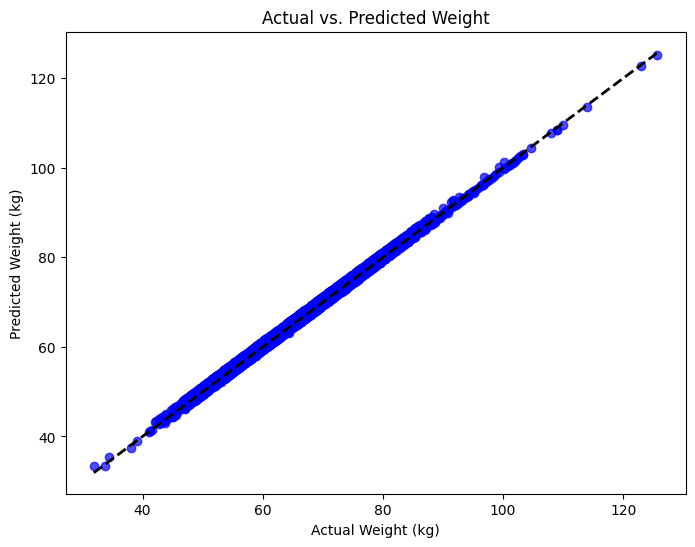

In [63]:
#Visualization
# Scatter Plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weight (kg)')
plt.ylabel('Predicted Weight (kg)')
plt.title('Actual vs. Predicted Weight')


Text(0.5, 1.0, 'Residuals Plot')

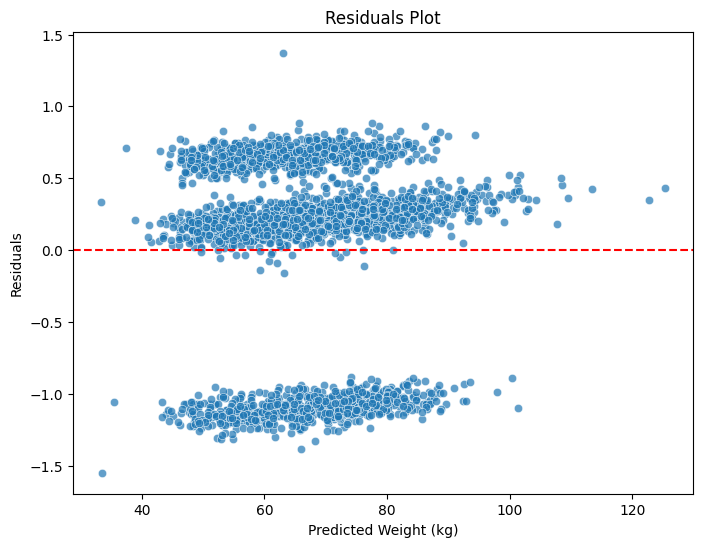

In [64]:

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Weight (kg)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')



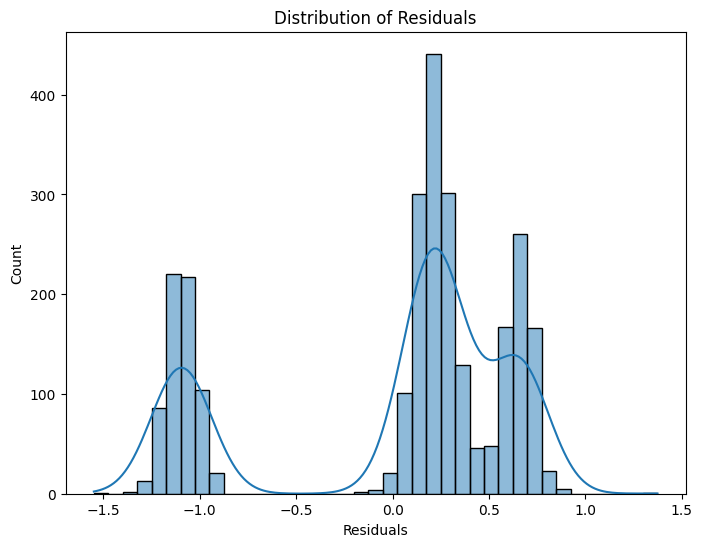

In [72]:
# Distribution Plot of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()